In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit

mobile_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy'
twitter_PATH = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/Tokyostation_3zi_2021.npy'
outlier_twitter_PATH  = '/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/outlier/Tokyostation_3zi_2021.npy'

mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)
mobile_flatten = mobile.flatten()
twitter_flatten = twitter.flatten()

In [127]:
np.argmax(twitter_flatten)

459

In [128]:
twitter_flatten[459] = twitter_flatten[458]

In [129]:
prob = twitter_flatten / mobile_flatten

In [130]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('21'+ month + day + hour)
            key = str(key)
            x_label.append(key)

In [131]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=prob, name='prob'),
])
fig.update_layout(xaxis=dict(title='prob'),
                 yaxis=dict(title='Time'))
fig.show()

In [132]:
prob = prob.reshape([365, 24])

In [133]:
prob_parhour = np.sum(prob, axis=0)
prob_parday = np.sum(prob, axis=1)

In [134]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
            key = int('21'+ month + day)
            key = str(key)
            x_label.append(key)

In [135]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=prob_parday, name='prob'),
])
fig.update_layout(xaxis=dict(title='prob'),
                 yaxis=dict(title='Time'))
fig.show()

In [136]:
x_label = []
for hour in range(0,24):
    hour = str(hour)
    x_label.append(hour)

In [137]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=prob_parhour, name='prob'),
])
fig.update_layout(xaxis=dict(title='time'),
                 yaxis=dict(title='prob'))
fig.show()

## 休日と平日

In [138]:
mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)
list_mobile_holiday = []
list_mobile_workday = []

list_twitter_holiday = []
list_twitter_workday = []

for i in range(0,365):
    if i%7 == 0:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 1:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 2:
        list_mobile_holiday.append(mobile[i].tolist())
        list_twitter_holiday.append(twitter[i].tolist())
    if i%7 == 3:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 4:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 5:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
    if i%7 == 6:
        list_mobile_workday.append(mobile[i].tolist())
        list_twitter_workday.append(twitter[i].tolist())
        

list_mobile_holiday = np.array(list_mobile_holiday)
list_mobile_workday = np.array(list_mobile_workday)

list_twitter_holiday = np.array(list_twitter_holiday)
list_twitter_workday = np.array(list_twitter_workday)

list_mobile_holiday = list_mobile_holiday.flatten()
list_mobile_workday = list_mobile_workday.flatten()
list_twitter_holiday = list_twitter_holiday.flatten()
list_twitter_workday = list_twitter_workday.flatten()

In [139]:
prob_workday = list_twitter_workday / list_mobile_workday
prob_holiday = list_twitter_holiday / list_mobile_holiday

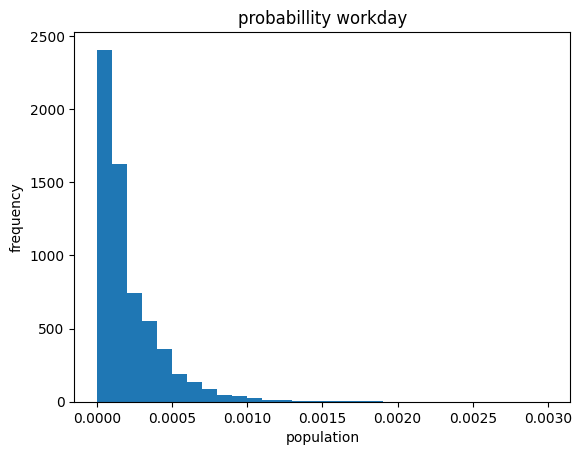

In [140]:
plt.hist(prob_workday, range=(0,0.003), bins=30)
plt.title('probabillity workday')
plt.xlabel('population')
plt.ylabel('frequency')
plt.show()

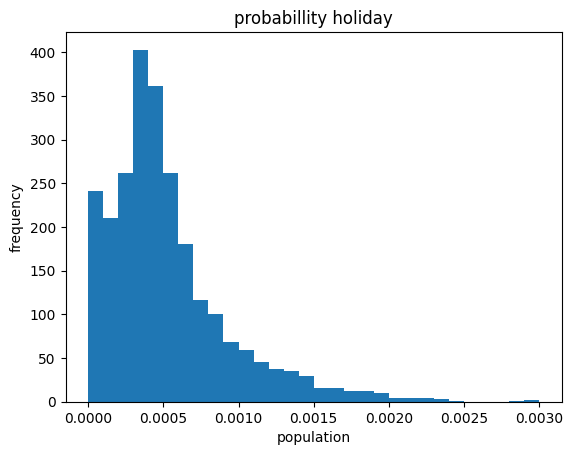

In [141]:
plt.hist(prob_holiday, range=(0,0.003), bins=30)
plt.title('probabillity holiday')
plt.xlabel('population')
plt.ylabel('frequency')
plt.show()

In [142]:
np.average(prob_workday)

0.00021408348359370754

In [143]:
np.average(prob_holiday)

0.0005259161659161443

## 曜日ごと

In [144]:
mobile = np.load(mobile_PATH)
twitter = np.load(outlier_twitter_PATH)

list_mobile_Sun = []
list_mobile_Mon = []
list_mobile_Tue = []
list_mobile_Wed = []
list_mobile_Thu = []
list_mobile_Fri = []
list_mobile_Sat = []

list_twitter_Sun = []
list_twitter_Mon = []
list_twitter_Tue = []
list_twitter_Wed = []
list_twitter_Thu = []
list_twitter_Fri = []
list_twitter_Sat = []
for i in range(0,365):
    if i%7 == 0:
        list_mobile_Fri.append(mobile[i].tolist())
        list_twitter_Fri.append(twitter[i].tolist())
    if i%7 == 1:
        list_mobile_Sat.append(mobile[i].tolist())
        list_twitter_Sat.append(twitter[i].tolist())
    if i%7 == 2:
        list_mobile_Sun.append(mobile[i].tolist())
        list_twitter_Sun.append(twitter[i].tolist())
    if i%7 == 3:
        list_mobile_Mon.append(mobile[i].tolist())
        list_twitter_Mon.append(twitter[i].tolist())
    if i%7 == 4:
        list_mobile_Tue.append(mobile[i].tolist())
        list_twitter_Tue.append(twitter[i].tolist())
    if i%7 == 5:
        list_mobile_Wed.append(mobile[i].tolist())
        list_twitter_Wed.append(twitter[i].tolist())
    if i%7 == 6:
        list_mobile_Thu.append(mobile[i].tolist())
        list_twitter_Thu.append(twitter[i].tolist())
        

list_twitter_Sun = np.array(list_twitter_Sun)
list_twitter_Mon = np.array(list_twitter_Mon)
list_twitter_Tue = np.array(list_twitter_Tue)
list_twitter_Wed = np.array(list_twitter_Wed)
list_twitter_Thu = np.array(list_twitter_Thu)
list_twitter_Fri = np.array(list_twitter_Fri)
list_twitter_Sat = np.array(list_twitter_Sat)

In [145]:
print(f"{np.average(list_twitter_Sun)}")
print(f"{np.average(list_twitter_Mon)}")
print(f"{np.average(list_twitter_Tue)}")
print(f"{np.average(list_twitter_Wed)}")
print(f"{np.average(list_twitter_Thu)}")
print(f"{np.average(list_twitter_Fri)}")
print(f"{np.average(list_twitter_Sat)}")

11.632211538461538
7.214743589743589
6.61698717948718
6.9631410256410255
7.092948717948718
8.489779874213836
11.462339743589743


In [146]:
x_label =['Sun',
          'Mon',
          'Tue',
          'Wed',
          'Thu',
          'Fri',
          'Sat']

In [147]:
prob_perdays = [np.average(list_twitter_Sun),
                     np.average(list_twitter_Mon),
                     np.average(list_twitter_Tue),
                     np.average(list_twitter_Wed),
                     np.average(list_twitter_Thu),
                     np.average(list_twitter_Fri),
                     np.average(list_twitter_Sat)]

In [148]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=prob_perdays, name='prob'),
])
fig.update_layout(xaxis=dict(title='time'),
                 yaxis=dict(title='prob'))
fig.show()